<a href="https://colab.research.google.com/github/Swaraj-sj2000/Machine-leaning-projects/blob/main/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 class Linear_Regression:
        def __init__(self,Learning_rate,no_of_iterations):
            self.Learning_rate=Learning_rate
            self.no_of_iterations=no_of_iterations
             
        
        def fit(self,X,Y):
            
            #first check dimensionality
            
            if X.shape[0] != Y.shape[0]:
                raise ValueError("Number of samples in X and Y should match.")
            
            self.m,self.n=X.shape #no. of rows and columns of features
            
            #initialising wt. and bias
            
            self.w=np.zeros(self.n)  #since the no. of features may not be 1
            self.b=0
            self.X=X
            self.Y=Y
            
            #implementing gradient descent
            
            for i in range(self.no_of_iterations):
                self.update_weights()
                
            # return self.w, self.b
        
        def update_weights(self ):
             
            Y_prediction=self.predict(self.X)
            
            #calculate gradients
            
            dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m #dw for each feature
            db=-(2*np.sum(self.Y-Y_prediction))/self.m
            
            #update the weights
            
            self.w=self.w-self.Learning_rate*dw
            self.b=self.b-self.Learning_rate*db
            
            
        
        def predict(self,X):
            return X.dot(self.w)+self.b   #Y=WX+b
        
        

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
salary_df=pd.read_csv('salary_data.csv')
salary_df.shape
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
X=salary_df.iloc[:,:-1].values  #all rows,all columns except last
Y=salary_df.iloc[:,1].values    #all rows and column 2

In [ ]:
print(X,Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=42)

In [ ]:
LR=Linear_Regression(0.02,int(10e4))

In [ ]:
LR.fit(X_train,Y_train)

In [ ]:
print(LR.w,LR.b)

[9426.03876907] 25324.335379244127


In [ ]:
Y_predicted=LR.predict(X_test)

In [ ]:
print(Y_predicted)

[115814.30756236  71511.92534771 102617.85328566  75282.34085534
  55487.65944028  60200.67882482 122412.53470072 107330.8726702
  63028.49045554  35692.97802523]


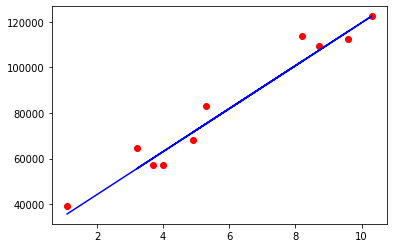

In [ ]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,Y_predicted,color='blue')
plt.show()